In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [120]:
df = pd.read_csv('dataset5000.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hospital_region_code               5000 non-null   float64
 1   Available Extra Rooms in Hospital  5000 non-null   float64
 2   Department                         5000 non-null   float64
 3   Ward_Type                          5000 non-null   float64
 4   Bed Grade                          5000 non-null   float64
 5   patientid                          5000 non-null   float64
 6   Type of Admission                  5000 non-null   float64
 7   Severity of Illness                5000 non-null   float64
 8   Visitors with Patient              5000 non-null   float64
 9   Age                                5000 non-null   float64
 10  Admission_Deposit                  5000 non-null   float64
 11  Stay                               5000 non-null   float

In [57]:
df.describe

<bound method NDFrame.describe of       Hospital_region_code  Available Extra Rooms in Hospital  Department  \
0                      1.0                           0.125000        0.00   
1                      1.0                           0.083333        0.00   
2                      0.0                           0.083333        0.25   
3                      0.5                           0.083333        0.00   
4                      0.5                           0.083333        0.00   
...                    ...                                ...         ...   
4995                   0.5                           0.083333        0.75   
4996                   0.5                           0.083333        0.75   
4997                   0.5                           0.125000        0.75   
4998                   0.5                           0.125000        0.75   
4999                   1.0                           0.166667        0.25   

      Ward_Type  Bed Grade  patientid  Ty

In [60]:
#切分训练集和测试集#
def randSplit(dataSet, rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test .index = range(test.shape[0]) 
    return train,test

In [61]:
train, test = randSplit(df)

In [62]:
train.shape

(4500, 12)

In [63]:
train

,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1.0,0.125000,0.00,0.5,0.333333,0.238530,0.0,1.000000,0.0625,0.476190,0.307411,0.000000
1,1.0,0.083333,0.00,0.0,0.333333,0.238530,1.0,1.000000,0.0625,0.476190,0.410474,0.380952
2,0.0,0.083333,0.25,0.0,0.333333,0.238530,1.0,1.000000,0.0625,0.476190,0.291008,0.285714
3,0.5,0.083333,0.00,0.5,0.333333,0.238530,1.0,1.000000,0.0625,0.476190,0.540711,0.380952
4,0.5,0.083333,0.00,0.0,0.333333,0.238530,1.0,1.000000,0.0625,0.476190,0.371344,0.380952
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.0,0.083333,0.75,1.0,0.000000,0.057254,0.0,0.333333,0.0625,0.380952,0.284486,0.190476
4496,0.0,0.166667,0.25,1.0,0.333333,0.057254,1.0,0.333333,0.1250,0.380952,0.259684,0.476190
4497,0.0,0.083333,0.50,0.5,0.666667,0.057254,0.5,0.333333,0.1250,0.380952,0.294763,0.095238
4498,0.0,0.083333,0.75,0.5,0.000000,0.057254,1.0,0.333333,0.0625,0.380952,0.317688,0.000000


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hospital_region_code               4500 non-null   float64
 1   Available Extra Rooms in Hospital  4500 non-null   float64
 2   Department                         4500 non-null   float64
 3   Ward_Type                          4500 non-null   float64
 4   Bed Grade                          4500 non-null   float64
 5   patientid                          4500 non-null   float64
 6   Type of Admission                  4500 non-null   float64
 7   Severity of Illness                4500 non-null   float64
 8   Visitors with Patient              4500 non-null   float64
 9   Age                                4500 non-null   float64
 10  Admission_Deposit                  4500 non-null   float64
 11  Stay                               4500 non-null   float

In [103]:
import numpy as np
def stayClass(train, test, k):
    n = train. shape[1]-1   #训练集的特征个数
    m = test. shape[0]     #测试集的样本数
    result = []                 #放置预测结果
    
    for i in range(m):
        train=pd.DataFrame(train,dtype=np.float)
        test=pd.DataFrame(test,dtype=np.float)
        dist = np.linalg.norm(train.iloc[:, :n]-test.iloc[i, :n],ord=1)
        dist_1 = pd.DataFrame({'dist':dist, 'labels':(train.iloc[:, n])})   #追加标签
        dr = dist_1.sort_values(by = 'dist')[: k]   #距离排序
        re = dr.loc[:, 'labels'].value_counts()     #统计
        result.append(re.index[0])    
    result = pd.Series(result)
    res = test.copy()
    res.loc[:, 'predict'] = result  #追加一列预测结果
    acc = (res.iloc[:,-1]==res.iloc[:,-2]).mean()    #计算预测的准确率
    print('accuracy{}'.format(acc))
    return acc, res

In [123]:
acc, df_stay = stayClass(train, test, 30)
df_stay.head()
train=pd.DataFrame(train,dtype=np.float)
test=pd.DataFrame(test,dtype=np.float)

accuracy0.2762


accuracy0.066
accuracy0.034
accuracy0.314
accuracy0.034
accuracy0.034
accuracy0.034
accuracy0.034
accuracy0.034
accuracy0.034
accuracy0.232
accuracy0.232
accuracy0.232
accuracy0.232
accuracy0.232
accuracy0.232
accuracy0.314
accuracy0.314
accuracy0.314
accuracy0.314
3
0.314


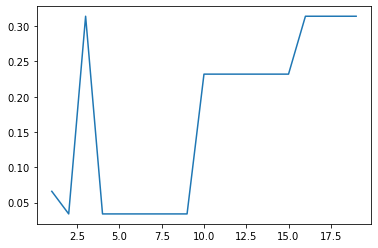

In [109]:
import matplotlib.pyplot as plt
#绘制学习曲线
score = []
krange = range(1,20)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))

In [110]:
df = pd.read_csv('datasetone.csv')

In [111]:
#切分训练集和测试集#
def randSplit(dataSet, rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test .index = range(test.shape[0]) 
    return train,test

In [113]:
train, test = randSplit(df)

In [114]:
train.shape

(44998, 12)

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44998 entries, 0 to 44997
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hospital_region_code               44998 non-null  float64
 1   Available Extra Rooms in Hospital  44998 non-null  float64
 2   Department                         44998 non-null  float64
 3   Ward_Type                          44998 non-null  float64
 4   Bed Grade                          44998 non-null  float64
 5   patientid                          44998 non-null  float64
 6   Type of Admission                  44998 non-null  float64
 7   Severity of Illness                44998 non-null  float64
 8   Visitors with Patient              44998 non-null  float64
 9   Age                                44998 non-null  float64
 10  Admission_Deposit                  44998 non-null  float64
 11  Stay                               44998 non-null  int

曼哈顿距离

In [116]:
import numpy as np
train=pd.DataFrame(train,dtype=np.float)
test=pd.DataFrame(test,dtype=np.float)
def stayClass(train, test, k):
    n = train. shape[1]-1   #训练集的特征个数
    m = test. shape[0]     #测试集的样本数
    result = []                 #放置预测结果
    
    for i in range(m):
        train=pd.DataFrame(train,dtype=np.float)
        test=pd.DataFrame(test,dtype=np.float)
        dist = np.linalg.norm(train.iloc[:, :n]-test.iloc[i, :n],ord=1)
        dist_1 = pd.DataFrame({'dist':dist, 'labels':(train.iloc[:, n])})   #追加标签
        dr = dist_1.sort_values(by = 'dist')[: k]   #距离排序
        re = dr.loc[:, 'labels'].value_counts()     #统计
        result.append(re.index[0])    
    result = pd.Series(result)
    res = test.copy()
    res.loc[:, 'predict'] = result  #追加一列预测结果
    acc = (res.iloc[:,-1]==res.iloc[:,-2]).mean()    #计算预测的准确率
    print('accuracy{}'.format(acc))
    return acc, res

In [122]:
acc, df_stay = stayClass(train, test, 40)
df_stay.head()

accuracy0.2762


,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,predict
0,0.5,0.166667,0.75,0.5,0.666667,0.036886,1.0,0.333333,0.06250,0.47619,0.425395,15.0,25.0
1,0.0,0.125000,0.75,1.0,0.333333,0.036886,1.0,0.333333,0.12500,0.47619,0.316601,35.0,25.0
2,0.5,0.125000,0.75,0.5,0.333333,0.036886,0.0,0.333333,0.09375,0.47619,0.534190,35.0,25.0
3,1.0,0.083333,0.25,0.5,0.666667,0.036886,1.0,0.333333,0.06250,0.47619,0.312945,45.0,25.0
4,0.5,0.166667,0.75,0.5,0.333333,0.036886,0.0,0.333333,0.09375,0.47619,0.354447,35.0,25.0


accuracy0.0646
accuracy0.0338
accuracy0.26
accuracy0.033
accuracy0.0338
accuracy0.0338
accuracy0.0338
accuracy0.26
accuracy0.26
accuracy0.168
accuracy0.26
accuracy0.26
accuracy0.2762
accuracy0.168
accuracy0.168
accuracy0.168
accuracy0.168
accuracy0.168
accuracy0.168
13
0.2762


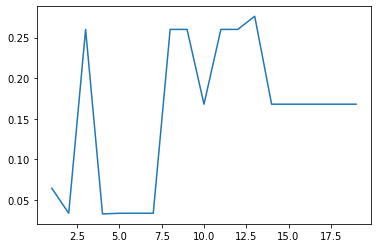

In [119]:
import matplotlib.pyplot as plt
#绘制学习曲线
score = []
krange = range(1,20)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))

In [128]:
import numpy as np
def stayClass(train, test, k):
    train=pd.DataFrame(train,dtype=np.float)
    test=pd.DataFrame(test,dtype=np.float)
    n = train. shape[1]-1   #训练集的特征个数
    m = test. shape[0]     #测试集的样本数
    result = []                 #放置预测结果
    for i in range(m):
        dist = list((((train.iloc[:, :n] - test.iloc[i, :n]) **2).sum(1))**.5)    #距离计算
        dist_1 = pd.DataFrame({'dist':dist, 'labels':(train.iloc[:, n])})   #追加标签
        dr = dist_1.sort_values(by = 'dist')[: k]   #距离排序
        re = dr.loc[:, 'labels'].value_counts()     #统计
        result.append(re.index[0])    
    result = pd.Series(result)
    res = test.copy()
    res.loc[:, 'predict'] = result  #追加一列预测结果
    acc = (res.iloc[:,-1]==res.iloc[:,-2]).mean()    #计算预测的准确率
    print('accuracy{}'.format(acc))
    return acc, res

accuracy0.2384
accuracy0.2404
accuracy0.2526
accuracy0.2612
accuracy0.2812
accuracy0.2854
accuracy0.285
accuracy0.2924
accuracy0.292
accuracy0.2892
accuracy0.2984
accuracy0.299
accuracy0.2988
accuracy0.3006
accuracy0.3038
accuracy0.3014
accuracy0.3056
accuracy0.3044
accuracy0.3042
accuracy0.3048
accuracy0.3046
accuracy0.3058
accuracy0.3024
accuracy0.3046
accuracy0.3064
accuracy0.306
accuracy0.306
accuracy0.3072
accuracy0.3086
29
0.3086


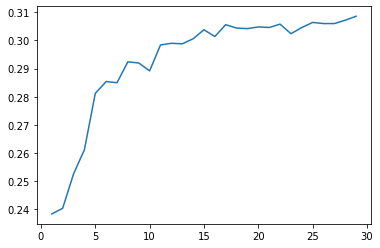

In [129]:
import matplotlib.pyplot as plt
#绘制学习曲线
score = []
krange = range(1,30)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))

# features are chosen according to correlation3

In [ ]:
def randSplit(dataSet, rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test .index = range(test.shape[0]) 
    return train,test

In [ ]:
def randSplit(dataSet, rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test .index = range(test.shape[0]) 
    return train,test

In [ ]:
rain, test = randSplit(df)

In [ ]:
train.shape

In [ ]:
train

In [ ]:
test.shape

In [ ]:
test

In [ ]:
import numpy as np
def stayClass(train, test, k):
    train=pd.DataFrame(train,dtype=np.float)
    test=pd.DataFrame(test,dtype=np.float)
    n = train. shape[1]-1   
    m = test. shape[0]     
    result = []                
    for i in range(m):
        dist = list((((train.iloc[:, :n] - test.iloc[i, :n]) **2).sum(1))**.5)    
        dist_1 = pd.DataFrame({'dist':dist, 'labels':(train.iloc[:, n])})   
        dr = dist_1.sort_values(by = 'dist')[: k] 
        re = dr.loc[:, 'labels'].value_counts()  
        result.append(re.index[0])    
    result = pd.Series(result)
    res = test.copy()
    res.loc[:, 'predict'] = result 
    acc = (res.iloc[:,-1]==res.iloc[:,-2]).mean()   
    print('accuracy{}'.format(acc))
    return acc, res

In [ ]:
acc, df_stay = stayClass(train, test, 50)
df_stay.head()

In [ ]:
import matplotlib.pyplot as plt
score = []
krange = range(1,30)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))

In [ ]:
import matplotlib.pyplot as plt
score = []
krange = range(1,30)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))

In [ ]:
df = pd.read_csv('datasetfull.csv')

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
def randSplit(dataSet, rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test .index = range(test.shape[0]) 
    return train,test

In [ ]:
train, test = randSplit(df)

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
import numpy as np
def stayClass(train, test, k):
    train=pd.DataFrame(train,dtype=np.float)
    test=pd.DataFrame(test,dtype=np.float)
    n = train. shape[1]-1   
    m = test. shape[0]     
    result = []                 
    for i in range(m)
        dist = list((((train.iloc[:, :n] - test.iloc[i, :n]) **2).sum(1))**.5)   
        dist_1 = pd.DataFrame({'dist':dist, 'labels':(train.iloc[:, n])})   
        dr = dist_1.sort_values(by = 'dist')[: k] 
        re = dr.loc[:, 'labels'].value_counts()    
        result.append(re.index[0])    
    result = pd.Series(result)
    res = test.copy()
    res.loc[:, 'predict'] = result
    acc = (res.iloc[:,-1]==res.iloc[:,-2]).mean()   
    print('accuracy{}'.format(acc))
    return acc, res

In [ ]:
acc, df_stay = stayClass(train, test, 40)
df_stay.head()

In [ ]:
import matplotlib.pyplot as plt
score = []
krange = range(21,45)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))

In [ ]:
import matplotlib.pyplot as plt
score = []
krange = range(1,45)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))